# Neural Networks

#### Neurons perform simple linear transformations on data input to them. For a neuron with a single input x, the neuron’s value y is computed by multiplying x by the weight m assigned to the input and adding b, the neuron’s bias:

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(3, activation='relu', input_dim=2))
model.add(Dense(1))

In [4]:
model.compile(optimizer='adam', loss='mae', metrics=['mae'])

- Greater widths and depths give the network more capacity to “learn” by fitting more tightly to the training data. They also increase the likelihood of overfitting. It’s the validation results that matter, and sometimes loosening the fit to the training data allows the network to generalize better. The simplest way to loosen the fit is to reduce the number of neurons.
- Generally speaking, you prefer greater width to greater depth in part to avoid the vanishing gradient problem, which diminishes the impact of added layers. The ReLU activation function provides some protection against vanishing gradients, but that protection isn’t absolute. For an explanation, see “How to Fix the Vanishing Gradients Problem Using the ReLU”. In addition, a network with, say, 100 neurons in one layer trains faster than a network with five layers of 20 neurons each because the former has fewer weights. Think about it: there are no connections between neurons in one layer, but there are 1,600 connections (202 × 4) between five layers containing 20 neurons each.
- Fewer neurons means less training time. State-of-the-art neural networks trained with large datasets sometimes take days or weeks to train on high-end GPUs, so training time is important.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

err = hist.history['mae']
val_err = hist.history['val_mae']
epochs = range(1, len(err) + 1)

plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()

In [5]:
import pandas as pd

df = pd.read_csv('/Users/maukanmir/Downloads/creditcard.csv')
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [6]:
from sklearn.model_selection import train_test_split

x = df.drop(['Time', 'Class'], axis=1)
y = df['Class']

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, stratify=y, random_state=0)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential() 
model.add(Dense(128, activation='relu', input_dim=29))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               3840      
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 3,969
Trainable params: 3,969
Non-trainable params: 0
_________________________________________________________________


In [8]:

hist = model.fit(x_train, y_train, validation_data=(x_test, y_test),
                 epochs=10, batch_size=100)

Epoch 1/10
   1/2279 [..............................] - ETA: 6:38 - loss: 0.4842 - accuracy: 0.8000

2024-08-19 09:41:10.937770: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


2279/2279 [==============================] - 1s 402us/step - loss: 0.0190 - accuracy: 0.9989 - val_loss: 0.0414 - val_accuracy: 0.9991
Epoch 2/10
2279/2279 [==============================] - 1s 363us/step - loss: 0.0142 - accuracy: 0.9992 - val_loss: 0.0210 - val_accuracy: 0.9991
Epoch 3/10
2279/2279 [==============================] - 1s 365us/step - loss: 0.0083 - accuracy: 0.9993 - val_loss: 0.0067 - val_accuracy: 0.9994
Epoch 4/10
2279/2279 [==============================] - 1s 361us/step - loss: 0.0105 - accuracy: 0.9993 - val_loss: 0.0268 - val_accuracy: 0.9992
Epoch 5/10
2279/2279 [==============================] - 1s 390us/step - loss: 0.0079 - accuracy: 0.9994 - val_loss: 0.0041 - val_accuracy: 0.9993
Epoch 6/10
2279/2279 [==============================] - 1s 394us/step - loss: 0.0075 - accuracy: 0.9993 - val_loss: 0.0054 - val_accuracy: 0.9994
Epoch 7/10
2279/2279 [==============================] - 1s 387us/step - loss: 0.0084 - accuracy: 0.9994 - val_loss: 0.0049 - val_accura

[]

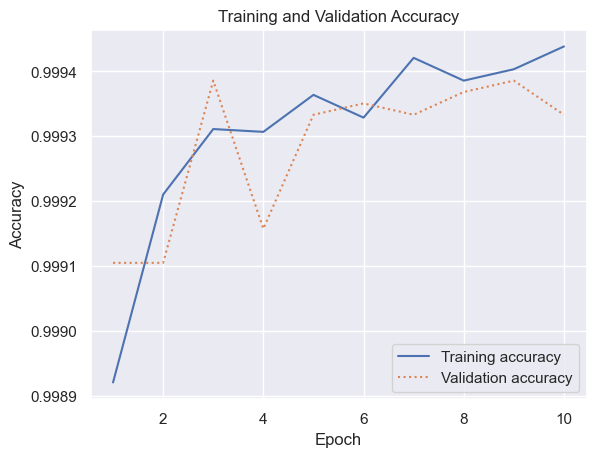

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

1781/1781 [==============================] - 0s 207us/step


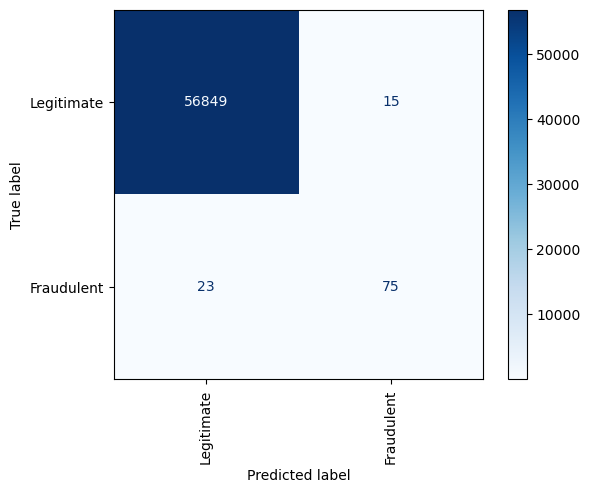

In [10]:

from sklearn.metrics import ConfusionMatrixDisplay as cmd

sns.reset_orig()
y_predicted = model.predict(x_test) > 0.5
labels = ['Legitimate', 'Fraudulent']

cmd.from_predictions(y_test, y_predicted, display_labels=labels,
                     cmap='Blues', xticks_rotation='vertical')

In [11]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10,
                 batch_size=100, class_weight={ 0: 1.0, 1: 0.01 })

Epoch 1/10
2279/2279 [==============================] - 1s 423us/step - loss: 2.0638e-04 - accuracy: 0.9990 - val_loss: 0.0071 - val_accuracy: 0.9991
Epoch 2/10
2279/2279 [==============================] - 1s 413us/step - loss: 2.9593e-04 - accuracy: 0.9989 - val_loss: 0.0206 - val_accuracy: 0.9984
Epoch 3/10
2279/2279 [==============================] - 1s 413us/step - loss: 1.6212e-04 - accuracy: 0.9989 - val_loss: 0.0065 - val_accuracy: 0.9991
Epoch 4/10
2279/2279 [==============================] - 1s 410us/step - loss: 2.2872e-04 - accuracy: 0.9990 - val_loss: 0.0278 - val_accuracy: 0.9983
Epoch 5/10
2279/2279 [==============================] - 1s 404us/step - loss: 2.3979e-04 - accuracy: 0.9989 - val_loss: 0.0240 - val_accuracy: 0.9985
Epoch 6/10
2279/2279 [==============================] - 1s 411us/step - loss: 3.9026e-04 - accuracy: 0.9989 - val_loss: 0.0233 - val_accuracy: 0.9989
Epoch 7/10
2279/2279 [==============================] - 1s 410us/step - loss: 3.3521e-04 - accuracy: